# PAINT Data Tutorial

This interactive notebook provides a brief overview of the PAINT database, demonstrating how to:
- Initialize the STAC client.
- Download and inspect metadata.
- Generate calibration data splits.
- Load calibration data using a dataloader.
- Download and inspect other types of PAINT data.

> **Note:** Python executable scripts for each step are available in the ``scripts`` folder of the [PAINT GitHub](https://github.com/ARTIST-Association/PAINT/tree/main/scripts). We recommend using those scripts if you plan to download and process large amounts of PAINT data.

## Getting Started

To run this tutorial, ensure you have the ``PAINT`` tutorial dependencies installed:
```
pip install "paint-csp[tutorial]"
```
To verify the installation, let's import ``PAINT`` and check the version attribute:

In [1]:
import paint

print(f"PAINT is running with version: {paint.__version__}")

PAINT is running with version: 2.0.1


We also need to specify a directory where all downloaded data will be saved. **Update the file path below to a location that works for your system:**

In [2]:
from pathlib import Path

download_path = Path("./PAINT_tutorial_data")

## Downloading Metadata

Before working with the actual PAINT data, we will inspect the metadata to understand what is available. For this tutorial, we will focus on a small subset of heliostats: those with IDs starting with "AA". This includes the range from **AA23 to AA51**.

In the next step, we will:
- Generate a list of heliostats to access.
- Create a STAC client.
- Download the metadata and save it to the specified location.

In [3]:
# Import the STAC client.
from paint.data import StacClient

# Generate heliostat list.
heliostat_list = [f"AA{i}" for i in range(23, 52)]

# Initialize STAC client.
client = StacClient(output_dir=download_path)

# Download metadata.
client.get_heliostat_metadata(heliostats=heliostat_list)

No collections selected - downloading data for all collections!
Processing Heliostat Catalogs:  55%|████▉    | 16/29 [00:09<00:04,  3.17 catalog/s]The child with ID AA43-deflectometry-collection is not available, data for this child cannot be accessed.
The child with ID AA48-deflectometry-collection is not available, data for this child cannot be accessed.
Processing Heliostat Catalogs:  76%|██████▊  | 22/29 [00:09<00:00,  7.38 catalog/s]The child with ID AA46-deflectometry-collection is not available, data for this child cannot be accessed.
The child with ID AA45-deflectometry-collection is not available, data for this child cannot be accessed.
Processing Heliostat Catalogs: 100%|█████████| 29/29 [00:05<00:00,  5.22 catalog/s]


Notice the following details in the output above:
1. **"No collections selected" Log:** This appears because we did not use the ``collections`` argument. Consequently, metadata for *all* available collections, i.e., properties, calibration, and deflectometry, was downloaded for the selected heliostats.
2. **Data Availability Warnings:** These are expected. While properties data exists for all heliostats, deflectometry and calibration data are only available for a subset of them.

## Inspecting the Metadata

Let's load the metadata to inspect it. In your download folder, you should now see a ``metadata`` directory containing three CSV files:
- Calibration metadata
- Deflectometry metadata
- Properties metadata

These filenames are automatically appended with ``selected_heliostats`` and a timestamp to uniquely identify them.

In the next step, we will load these files. Note that this tutorial assumes your download folder contains exactly one of each metadata file type. If you have run previous downloads, ensure only the relevant files are present, or the code below may fail.

In [4]:
import pandas as pd

# Load file names.
calibration_metadata_file = list(
    Path(download_path / "metadata").glob("calibration*.csv")
)
deflectometry_metadata_file = list(
    Path(download_path / "metadata").glob("deflectometry*.csv")
)
properties_metadata_file = list(
    Path(download_path / "metadata").glob("properties*.csv")
)

# Test to make sure the folder structure is as expected.
if (
    len(calibration_metadata_file)
    == len(deflectometry_metadata_file)
    == len(properties_metadata_file)
    == 1
):
    calibration_metadata_file = calibration_metadata_file[0]
    deflectometry_metadata_file = deflectometry_metadata_file[0]
    properties_metadata_file = properties_metadata_file[0]
else:
    print(
        "Incorrect metadata structure - this tutorial is designed specifically for a metadata folder containing "
        "a single calibration metadata, deflectometry metadata, and properties metadata file. If multiple files "
        "are present or one of these are missing the tutorial will not run as desired. Please check you ran the "
        "steps above correctly!"
    )

# Open the metadata files.
calibration_metadata = pd.read_csv(calibration_metadata_file)
deflectometry_metadata = pd.read_csv(deflectometry_metadata_file)
properties_metadata = pd.read_csv(properties_metadata_file)

# Inspect the properties metadata.
print(
    f"The properties metadata file contains {len(properties_metadata)} rows and {len(properties_metadata.columns)} columns.\n"
    f"The columns are: {', '.join(properties_metadata.columns)}"
)

The properties metadata file contains 29 rows and 6 columns.
The columns are: Id, HeliostatId, latitude, longitude, Elevation, DateTime


The properties metadata contains information on the 29 heliostats we are considering:
- **Id:** The ID of the STAC file containing the properties information
- **HeliostatId:** The specific ID of the heliostat
- **latitude:** The latitude of the heliostat
- **longitude:** The longitude of the heliostat
- **Elevation:** The elevation of the heliostat
- **DateTime:** The timestamp of the measurement

In [5]:
properties_metadata.head()

,Id,HeliostatId,latitude,longitude,Elevation,DateTime
0,AA23-heliostat-properties,AA23,50.913647,6.387012,88.590057,2021-07-20 05:09:00+00:00
1,AA24-heliostat-properties,AA24,50.913646,6.387075,88.599808,2021-07-20 05:09:00+00:00
2,AA25-heliostat-properties,AA25,50.913646,6.387138,88.620598,2021-07-20 05:09:00+00:00
3,AA26-heliostat-properties,AA26,50.913646,6.387200,88.603058,2021-07-20 05:09:00+00:00
4,AA27-heliostat-properties,AA27,50.913646,6.387263,88.615654,2021-07-20 05:09:00+00:00


Above we can see the first five rows of this metadata table. Now lets look at the calibration metadata:

In [6]:
# Inspect the calibration metadata.
print(
    f"The calibration metadata file contains {len(calibration_metadata)} rows and {len(calibration_metadata.columns)} columns.\n"
    f"The columns are: {', '.join(calibration_metadata.columns)}"
)

The calibration metadata file contains 4691 rows and 17 columns.
The columns are: Id, HeliostatId, Azimuth, Elevation, lower_left_latitude, lower_left_longitude, lower_left_Elevation, upper_left_latitude, upper_left_longitude, upper_left_Elevation, upper_right_latitude, upper_right_longitude, upper_right_Elevation, lower_right_latitude, lower_right_longitude, lower_right_Elevation, DateTime


This dataframe contains significantly more rows because there are often multiple calibration measurements for each heliostat. The columns include:
- **Id:** The measurement ID of the calibration measurement
- **HeliostatId:** The ID of the heliostat used for this measurement
- **Azimuth:** The sun's azimuth at the time of measurement
- **Elevation:** The sun's elevation at the time of measurement
- **Target Coordinates:** The latitude, longitude, and elevation for the *lower_left*, *upper_left*, *upper_right*, and *lower_right* corners of the calibration target
- **DateTime:** The timestamp of the measurement

The first five rows are displayed below:

In [7]:
calibration_metadata.head()

,Id,HeliostatId,Azimuth,Elevation,lower_left_latitude,lower_left_longitude,lower_left_Elevation,upper_left_latitude,upper_left_longitude,upper_left_Elevation,upper_right_latitude,upper_right_longitude,upper_right_Elevation,lower_right_latitude,lower_right_longitude,lower_right_Elevation,DateTime
0,225295,AA23,81.839158,37.047879,50.913396,6.387613,135.789,50.913396,6.387613,142.175,50.913397,6.387536,142.172,50.913397,6.387536,135.783,2023-06-27 05:39:56+00:00
1,199617,AA23,-24.275629,48.834090,50.913396,6.387613,135.789,50.913396,6.387613,142.175,50.913397,6.387536,142.172,50.913397,6.387536,135.783,2023-04-21 10:37:26+00:00
2,62302,AA23,-42.017068,8.527271,50.913396,6.387613,135.789,50.913396,6.387613,142.175,50.913397,6.387536,142.172,50.913397,6.387536,135.783,2022-01-18 13:44:45+00:00
3,222963,AA23,-6.400352,62.327916,50.913392,6.387886,119.268,50.913392,6.387886,126.470,50.913392,6.387763,126.506,50.913392,6.387763,119.279,2023-06-16 09:48:04+00:00
4,212358,AA23,66.411607,45.213617,50.913392,6.387886,119.268,50.913392,6.387886,126.470,50.913392,6.387763,126.506,50.913392,6.387763,119.279,2023-05-31 06:35:41+00:00


Now finally it is time to inspect the deflectometry metadata:

In [8]:
# Inspect the deflectometry metadata.
print(
    f"The deflectometry metadata file contains {len(deflectometry_metadata)} rows and {len(deflectometry_metadata.columns)} columns.\n"
    f"The columns are: {', '.join(deflectometry_metadata.columns)}"
)

The deflectometry metadata file contains 39 rows and 6 columns.
The columns are: Id, HeliostatId, latitude, longitude, Elevation, DateTime


Again, we see more rows than the number of heliostats because some heliostats contain multiple deflectometry measurements. The columns are nearly identical to the properties metadata, with one key difference: the **Id** column refers to the *deflectometry STAC ID*, not the properties ID.

The first five rows are displayed below:

In [9]:
deflectometry_metadata.head()

,Id,HeliostatId,latitude,longitude,Elevation,DateTime
0,AA23-2021-10-13Z09-27-07Z-deflectometry,AA23,50.913647,6.387012,88.590057,2021-10-13 09:27:07+00:00
1,AA24-2021-10-13Z09-29-29Z-deflectometry,AA24,50.913646,6.387075,88.599808,2021-10-13 09:29:29+00:00
2,AA25-2021-10-13Z09-32-36Z-deflectometry,AA25,50.913646,6.387138,88.620598,2021-10-13 09:32:36+00:00
3,AA26-2021-10-13Z09-34-21Z-deflectometry,AA26,50.913646,6.387200,88.603058,2021-10-13 09:34:21+00:00
4,AA27-2021-10-12Z13-27-32Z-deflectometry,AA27,50.913646,6.387263,88.615654,2021-10-12 13:27:32+00:00


Since we will be using the calibration dataset later, let's inspect it in more detail. Specifically, we look at how many of our heliostats have calibration measurements and how the number of calibration measurements varies across the heliostats:

In [10]:
from IPython.display import HTML, display

# Calculate counts once.
counts = calibration_metadata["HeliostatId"].value_counts()
unique_heliostats = calibration_metadata["HeliostatId"].nunique()

# Create DataFrames for better rendering.
top_5 = counts.head(5).to_frame(name="Measurement Count")
bottom_5 = counts.tail(5).to_frame(name="Measurement Count")

display(
    HTML(f"""
<p><strong> Unique Heliostats: {unique_heliostats}</strong></p>
<div style="display: flex; gap: 50px;">
    <div>
        <strong>Top 5 (Most Measurements)</strong>
        {top_5.to_html()}
    </div>
    <div>
        <strong>Bottom 5 (Least Measurements)</strong>
        {bottom_5.to_html()}
    </div>
</div>
""")
)

,Measurement Count
HeliostatId,
AA23,262
AA24,228
AA51,223
AA45,215
AA49,214
,Measurement Count
HeliostatId,
AA42,140
AA39,139


**Key takeaways for the next steps:**
- We have 27 heliostats with calibration measurements.
- One heliostat (AA43) has only a single calibration measurement; the rest has at least 95 each.

## Creating a Calibration Dataset Split from the Metadata

Now that we have inspected the metadata, we can create a dataset split for the calibration data. To summarize the nature of calibration data:
- Heliostats often have unknown offsets and deformations, which cause deviations from the intended pointing direction.
- Power plant operators use *calibration targets* to capture photos of the flux image generated by a single heliostat. These images help determine pointing errors.
- Multiple measurements are taken across different times and seasons to assist with operations.

This data is ideal for machine learning. We can use these images to train algorithms that improve power plant operation.

For such algorithms, training, validation, and test splits are required. ``PAINT`` provides multiple splitting methods, including the *Azimuth Split*, *Solstice Split*, *Balanced Split*, and *High-Variance Split* (see the [documentation here](https://paint.readthedocs.io/en/latest/splitter.html)).

In this tutorial, we will use the **Balanced Split**, which uses k-means clustering on the azimuth and elevation features to ensure a stratified selection:
  - Data is clustered into ``validation_size`` clusters.
  - One data point per cluster is selected for the **validation** subset.
  - A distinct point from the same cluster is selected for the **test** subset (if possible).
  - Missing test samples are filled from the overall pool to maintain balance.
  - Remaining data points are assigned to the **training** subset.

In [11]:
# Import paint mappings and dataset splitter.
import paint.util.paint_mappings as mappings
from paint.data.dataset_splits import DatasetSplitter

# Set train and validation size.
training_size = 25
validation_size = 5

# Create the dataset splitter.
splitter = DatasetSplitter(
    input_file=calibration_metadata_file, output_dir=download_path
)

# Perform the balanced split.
split_data = splitter.get_dataset_splits(
    split_type=mappings.BALANCED_SPLIT,
    training_size=training_size,
    validation_size=validation_size,
)

# Inspect the size of the splits.
split_data.Split.value_counts()

Split
train         650
validation    130
test          130
Name: count, dtype: int64

**Verifying the Split**

Does this output align with our earlier analysis?
- We have 27 heliostats with calibration measurements, but one (AA43) had only a single measurement.
- Because our validation size is 5, any heliostat with fewer than 5 measurements is excluded.
- This leaves 26 heliostats. With a validation size of 5 (and a matching test size of 5), we expect: $26 \times 5 = 130$ samples for both validation and test sets.
- With a training size of 25, we expect: $25 \times 26 = 650$ training samples.

The numbers match! The split data has been automatically saved as a CSV in your download path (e.g., `benchmark_split-balanced_train-25_validation-5.csv`).

## Creating a Dataset

Now that we have defined our splits, we can use the built-in ``PAINT`` functionality to create a ``torch.Dataset``. While there are several ways to create datasets (see [this tutorial](https://paint.readthedocs.io/en/latest/dataset.html)), we will use the benchmark split data we just generated.

We must specify:
- The benchmark split file
- The root directory for downloads
- The item type
- Whether to download the data

In this case, we use calibration images that have been cropped and centered on the **flux center of mass**. These are compressed and pre-processed, ensuring faster download times for this tutorial.

In [12]:
from paint.data.dataset import PaintCalibrationDataset

# Initialize dataset from benchmark splits.
train, test, val = PaintCalibrationDataset.from_benchmark(
    benchmark_file=split_data,
    root_dir=download_path,
    item_type=mappings.CALIBRATION_FLUX_CENTERED_IMAGE_KEY,
    download=True,
)

This results in a custom dataset that implements the standard PyTorch ``__getitem__()`` method. We can easily access the data (stored as tensors) for machine learning applications.

Below is an example of loading and plotting the first four measurements from the training dataset:

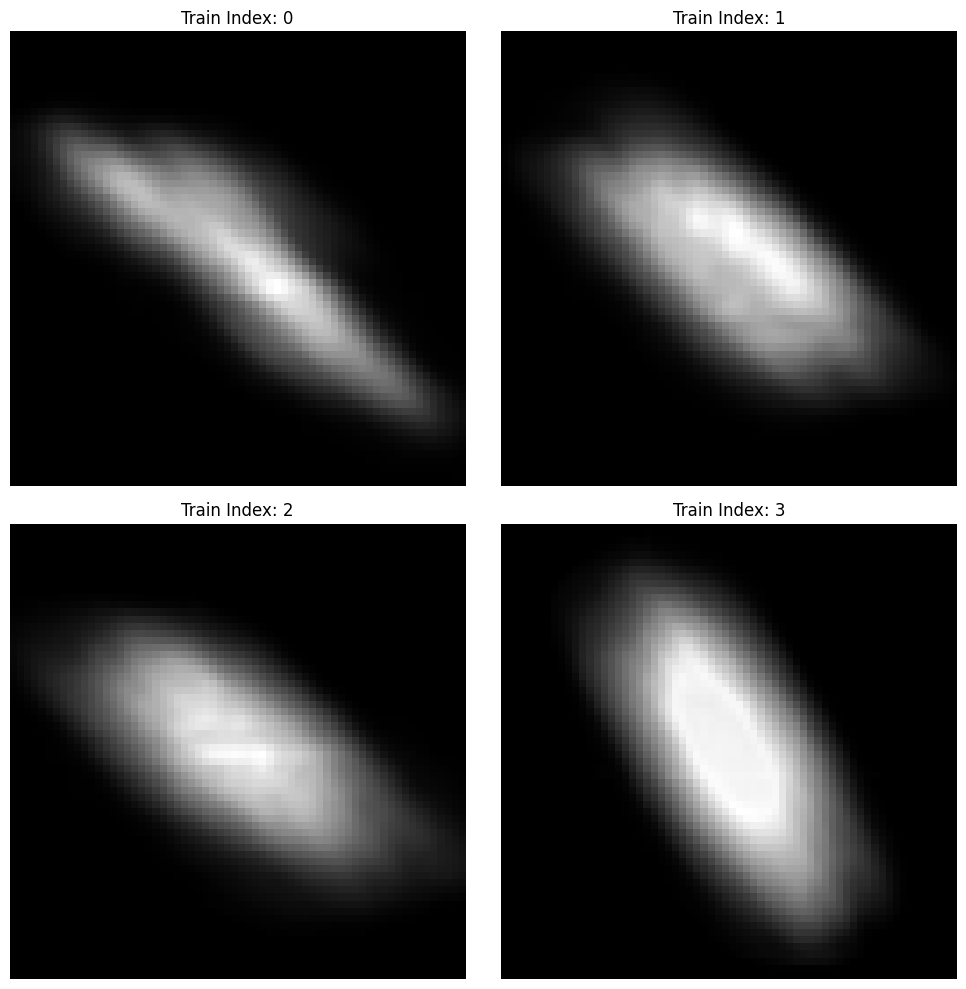

In [13]:
import matplotlib.pyplot as plt

# Create a 2x2 grid.
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

for i in range(4):
    # Determine the row and column index.
    ax = axes[i // 2, i % 2]

    # Grab the i-th item from your dataset.
    item = train[i]

    # Convert (C, H, W) -> (H, W, C) for plotting.
    img_data = item.permute(1, 2, 0).detach().cpu().numpy()

    ax.imshow(img_data)
    ax.set_title(f"Train Index: {i}")
    ax.axis("off")

plt.tight_layout()
plt.show()

## Downloading Further Heliostat Data

We have spent most of this tutorial looking at the calibration data, since this holds the most potential for machine learning applications. However, it is worth considering the other available data as well. We will download deflectometry data and properties data for the heliostat "AA23" in the following and briefly inspect it:

In [14]:
client.get_heliostat_data(
    heliostats=["AA23"],
    collections=[mappings.SAVE_DEFLECTOMETRY.lower(), mappings.SAVE_PROPERTIES.lower()],
)

Processing Items in Heliostat AA23-heliostat-catalog: 100%|█| 1/1 [00:02<00:00,  2.
Processing Items in Heliostat AA23-heliostat-catalog: 100%|█| 1/1 [00:00<00:00,  7.


### Properties Data

There should now be a new folder in your download path called ``AA23``. Within this folder there will be two more subfolders, ``Deflectometry`` and ``Properties``.

Let's first look at the properties data:

In [15]:
import json

from IPython.display import JSON

# Load the file.
with open(
    Path(download_path) / "AA23" / "Properties" / "AA23-heliostat-properties.json", "r"
) as f:
    properties_data = json.load(f)

# Display the file (nice formatting).
JSON(properties_data)

<IPython.core.display.JSON object>

The JSON output contains detailed information on the heliostat, including:
- **Position:** Its coordinates in the field
- **Dimensions:** Its height and width
- **Orientation:** Its standard initial orientation (East, North, Up coordinates)
- **Kinematics:** Properties of the actuators and joint offsets
- **Facets:** The number of facets, canting type, and translation vectors from the center
- **Renovation:** The date the heliostat was last renovated

Detailed diagrams explaining these parameters are available on the [PAINT website](https://paint-database.org/data).

### Deflectometry Data

Deflectometry data is stored in HDF5 files and contains detailed surface measurements for each heliostat facet. You will find two files in the ``Deflectometry`` folder:
- A raw deflectometry HDF5 file
- A "filled" HDF5 file, where missing values were substituted with ideal vectors. **Note:** This filling was performed by the measurement company using proprietary software; it is not part of the ``PAINT`` pre-processing.

We can inspect the HDF5 structure using the helper function below:

In [16]:
import h5py


# Helper function to print the structure of the HDF5 file.
def print_hdf5_structure(name: str, obj: h5py.Group | h5py.Dataset) -> None:
    """
    Print clear summary of HDF5 file structures.

    Parameters
    ----------
    name : str
        Name of the HDF5 element.
    obj : h5py.Dataset | h5py.Group
        Object to be inspected.
    """
    indent = name.count("/") * "    "
    if isinstance(obj, h5py.Group):
        print(f"{indent}📂 {name.split('/')[-1]}/")
    elif isinstance(obj, h5py.Dataset):
        print(
            f"{indent}📄 {name.split('/')[-1]} (shape: {obj.shape}, type: {obj.dtype})"
        )


filename = (
    Path(download_path)
    / "AA23"
    / "Deflectometry"
    / "AA23-filled-2021-10-13Z09-27-07Z-deflectometry.h5"
)

with h5py.File(filename, "r") as f:
    print(f"Structure of {filename}:")
    f.visititems(print_hdf5_structure)

Structure of PAINT_tutorial_data/AA23/Deflectometry/AA23-filled-2021-10-13Z09-27-07Z-deflectometry.h5:
📂 facet1/
    📄 surface_normals (shape: (80760, 3), type: float32)
    📄 surface_points (shape: (80760, 3), type: float32)
📂 facet2/
    📄 surface_normals (shape: (80760, 3), type: float32)
    📄 surface_points (shape: (80760, 3), type: float32)
📂 facet3/
    📄 surface_normals (shape: (80760, 3), type: float32)
    📄 surface_points (shape: (80760, 3), type: float32)
📂 facet4/
    📄 surface_normals (shape: (80760, 3), type: float32)
    📄 surface_points (shape: (80760, 3), type: float32)


This file contains detailed measurements (80,760 points) for each of the four facets. These can be used to recreate heliostat surfaces; however, that is beyond the scope of this tutorial.

## Further Data

To conclude, let's look at two additional data types available via PAINT.

### Weather Data

Weather data is available from a station located directly next to the tower in Jülich, as well as from the nearest DWD (German Weather Service) station. The code below downloads one month of Jülich data and the complete DWD dataset:

In [17]:
from datetime import datetime

client.get_weather_data(
    data_sources=["Jülich"],
    start_date=datetime.strptime("2023-01-01Z00:00:00Z", mappings.TIME_FORMAT),
    end_date=datetime.strptime("2023-02-01Z00:00:00Z", mappings.TIME_FORMAT),
)
client.get_weather_data(data_sources=["DWD"])

This weather data is also in HDF5 format, but each source has a slightly different structure. We can first consider the DWD data:

In [18]:
dwd_weather = Path(download_path) / "Weather" / "dwd-weather.h5"

with h5py.File(dwd_weather, "r") as f:
    print("Structure of DWD Weather Station (ID 15000):")
    f.visititems(print_hdf5_structure)

Structure of DWD Weather Station (ID 15000):
📂 15000/
    📂 cloud_cover_1h/
        📄 time (shape: (25561,), type: object)
        📄 value (shape: (25561,), type: float64)
    📂 global_radiation_10min/
        📄 time (shape: (153361,), type: object)
        📄 value (shape: (153361,), type: float64)
    📂 humidity_1h/
        📄 time (shape: (25561,), type: object)
        📄 value (shape: (25561,), type: float64)
    📂 long_wave_radiation_10min/
        📄 time (shape: (153361,), type: object)
        📄 value (shape: (153361,), type: float64)
    📂 pressure_vapor_1h/
        📄 time (shape: (25561,), type: object)
        📄 value (shape: (25561,), type: float64)
    📂 short_wave_radiation_10min/
        📄 time (shape: (153361,), type: object)
        📄 value (shape: (153361,), type: float64)
    📂 sunshine_duration_10min/
        📄 time (shape: (153361,), type: object)
        📄 value (shape: (153361,), type: float64)
    📂 visibility_range_1h/
        📄 time (shape: (25561,), type: object

Here the data is grouped by variable and we can clearly see that there are some variables available at 10min resolution and others at 1h resolution. For each variable we have:
- A time dataset containing the time stamps for each measurement
- The value dataset containing the recorded values

The Jülich weather data on the other hand is all at the same temporal resolution - a very high 1s resolution which results in the following structure:

In [19]:
juelich_weather = Path(download_path) / "Weather" / "2023-01-juelich-weather.h5"

with h5py.File(juelich_weather, "r") as f:
    print("Structure of the Jülich weather data:")
    f.visititems(print_hdf5_structure)

Structure of the Jülich weather data:
📄 atmospheric_pressure (shape: (2678303,), type: float64)
📄 diffuse_irradiation (shape: (2678303,), type: float64)
📄 direct_irradiation (shape: (2678303,), type: float64)
📄 global_irradiation (shape: (2678303,), type: float64)
📄 precipitation (shape: (2678303,), type: float64)
📄 relative_humidity (shape: (2678303,), type: float64)
📄 temperature (shape: (2678303,), type: float64)
📄 temperature_diffuse (shape: (2678303,), type: float64)
📄 temperature_direct (shape: (2678303,), type: float64)
📄 temperature_global (shape: (2678303,), type: float64)
📄 time (shape: (2678303,), type: object)
📄 wind_direction (shape: (2678303,), type: float64)
📄 wind_speed (shape: (2678303,), type: float64)


The Jülich data utilizes a flatter structure. All weather variable datasets contain the values, while a single ``time`` dataset contains the associated timestamps.

### Tower Measurements Data

Finally, we will download a small file containing properties of the solar tower itself.

In [20]:
client.get_tower_measurements()

After running this code you should see a new JSON file ``WRI1030197-tower-measurements.json`` in your download folder. We can inspect it with the same code as before:

In [21]:
# Load the file.
with open(Path(download_path) / "WRI1030197-tower-measurements.json", "r") as f:
    tower_data = json.load(f)

# Display the file (nice formatting).
JSON(tower_data)

<IPython.core.display.JSON object>

This file contains crucial properties of the solar tower, including:
- **ID:** The tower identifier
- **Coordinates:** Latitude, longitude, and elevation
- **Targets:** Coordinates for the various calibration targets (corners and center) and the receiver

## Conclusion

This concludes the tutorial. Please check our [documentation](https://paint.readthedocs.io/en/latest/usage.html) for further scripts and information. We hope you enjoy using the PAINT database!